# Import relevant library

In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers

# Get all data

In [2]:
batch_size = 32
image_size = (256, 256)
training_size = 0.8
testing_size = 0.1
validation_size = 0.1
epochs = 30

In [3]:
tomato_leaf_df = tf.keras.preprocessing.image_dataset_from_directory("archive/PlantVillage", 
                                                                    shuffle=True,
                                                                    image_size=image_size,
                                                                    batch_size=batch_size)

Found 16011 files belonging to 10 classes.


In [4]:
class_names = tomato_leaf_df.class_names
print(f"There are {len(class_names)} and ther name are: \n{class_names}")

There are 10 and ther name are: 
['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


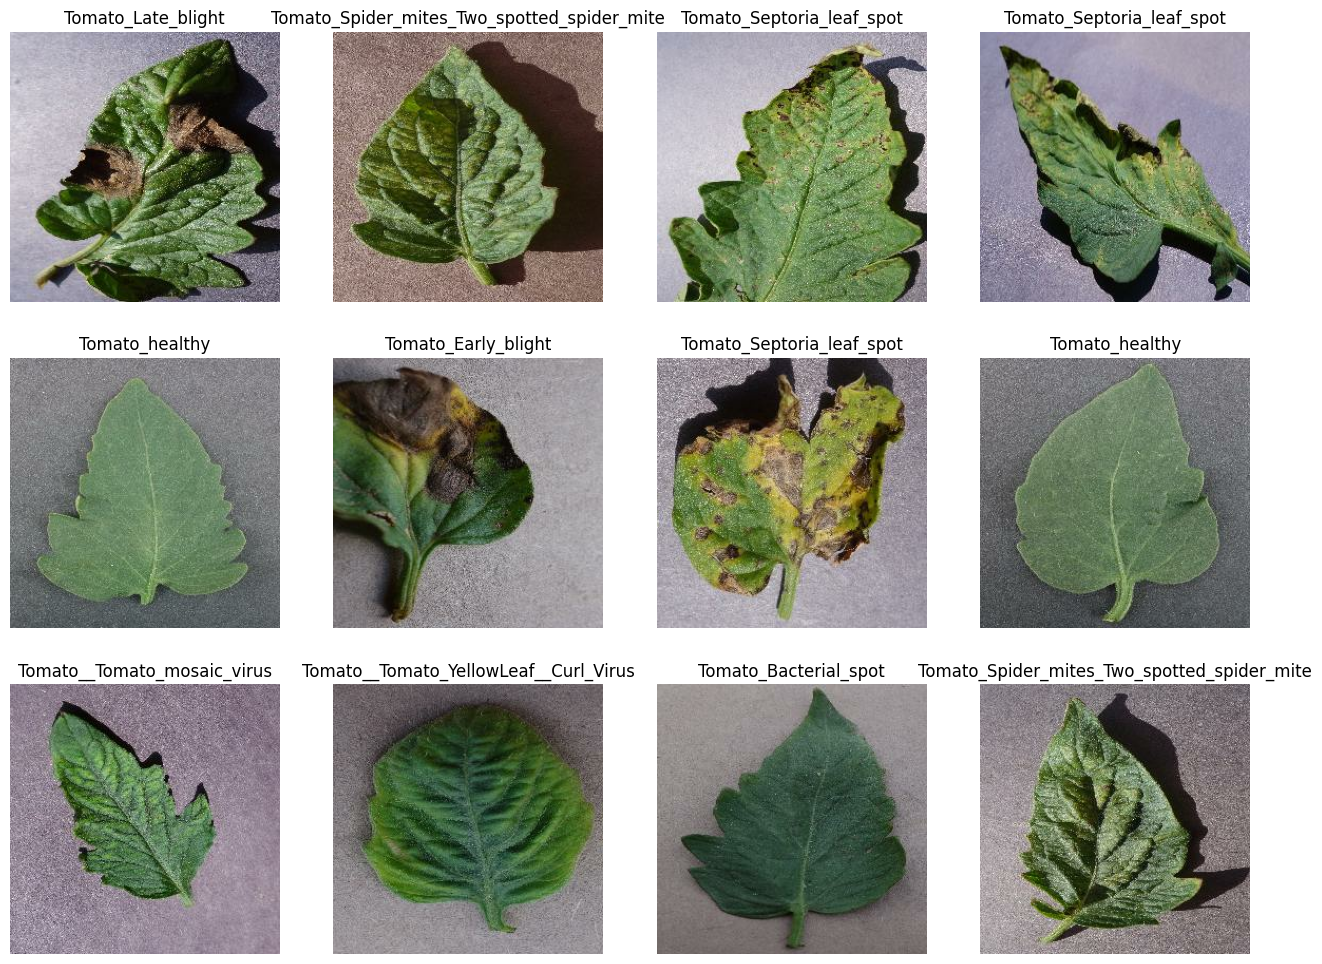

In [5]:
plt.figure(figsize=(16,12))
for image_batch, label_batch in tomato_leaf_df.take(1):
    for i in range(1,13):
        ax = plt.subplot(3, 4, i)
        plt.axis("off")
        plt.title(class_names[label_batch[i].numpy()])
        plt.imshow(image_batch[i].numpy().astype("uint32"))

# Split the data in training, testing and validation data

In [6]:
nr_baches = len(tomato_leaf_df)
training_baches_nr = int(nr_baches * training_size)
testing_baches_nr = int(nr_baches * testing_size)

In [7]:
training_tomato_leaf_df = tomato_leaf_df.take(training_baches_nr).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_tomato_leaf_df = tomato_leaf_df.skip(training_baches_nr).take(testing_baches_nr).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_tomato_leaf_df = tomato_leaf_df.skip(training_baches_nr).skip(testing_baches_nr).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
print(f"Total number of baches:      {nr_baches}")
print(f"Training number of baches:   {len(training_tomato_leaf_df)}")
print(f"Testing number of baches:    {len(testing_tomato_leaf_df)}")
print(f"Validation number of baches: {len(validation_tomato_leaf_df)}")

Total number of baches:      501
Training number of baches:   400
Testing number of baches:    50
Validation number of baches: 51


# Data Process and Augmentation

In [9]:
data_process = tf.keras.Sequential([
    layers.Resizing(image_size[0], image_size[1]),
    layers.Rescaling(1./255),
])

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertifal"),
    layers.RandomRotation(0.2),
])

# Create Model 

Create a CNN to identify the type of leaf

In [11]:
kernel_conv_size = (3, 3)
max_pooling_size = (2, 2)
neuron_size = 64

In [12]:
model = models.Sequential([
    data_process,
    data_augmentation,
    layers.Conv2D(32, kernel_conv_size, activation='relu', input_shape=(256, 256, 3), padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Conv2D(neuron_size, kernel_size=kernel_conv_size, activation='relu', padding='same'),
    layers.MaxPooling2D(max_pooling_size),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\git\PatatoDisease\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.build()

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# tf.keras.utils.plot_model(
#     model,
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_activations=True
# )

# Combile and Fit the Model

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
             )

In [17]:
calbacks = tf.keras.callbacks.EarlyStopping(patience=3, monitor='loss')

In [18]:
history = model.fit(
    training_tomato_leaf_df,
    epochs=30,
    batch_size=batch_size,
    verbose=1,
    validation_data=validation_tomato_leaf_df
)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 530s 1s/step - loss: 2.2136 - sparse_categorical_accuracy: 0.1973 - val_loss: 1.7236 - val_sparse_categorical_accuracy: 0.3830
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - loss: 1.6168 - sparse_categorical_accuracy: 0.4263 - val_loss: 1.5220 - val_sparse_categorical_accuracy: 0.4637
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - loss: 1.4016 - sparse_categorical_accuracy: 0.5054 - val_loss: 1.2914 - val_sparse_categorical_accuracy: 0.5388
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - loss: 1.2605 - sparse_categorical_accuracy: 0.5577 - val_loss: 1.3455 - val_sparse_categorical_accuracy: 0.5307
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - loss: 1.1905 - sparse_categorical_accuracy: 0.5874 - val_loss: 1.0122 - val_sparse_categorical_accuracy: 0.6487
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 467s 1s/step - loss: 1.0805 - sparse_categorical_accuracy: 0.6210 - val_loss: 0.9353 - val_sparse_categorical_accuracy: 0.663

In [19]:
model.evaluate(testing_tomato_leaf_df)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - loss: 0.8791 - sparse_categorical_accuracy: 0.6803


[0.837442934513092, 0.7037500143051147]